In [34]:
%matplotlib notebook

In [35]:
#Import modules
import numpy as np
import pandas as pd
import csv
import json
import requests
import datetime as dt
import matplotlib.pyplot as plt

In [36]:
#Import NY EMS data that was downloaded from https://data.cityofnewyork.us/Public-Safety/EMS-Incident-Dispatch-Data/76xm-jjuj
ems = pd.read_csv('Ems_data.csv.csv')
low_memory=False
ems.dtypes

C:\Users\Adavi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


CAD_INCIDENT_ID                     int64
INCIDENT_DATETIME                  object
INITIAL_CALL_TYPE                  object
INITIAL_SEVERITY_LEVEL_CODE         int64
FINAL_CALL_TYPE                    object
FINAL_SEVERITY_LEVEL_CODE           int64
FIRST_ASSIGNMENT_DATETIME          object
VALID_DISPATCH_RSPNS_TIME_INDC     object
DISPATCH_RESPONSE_SECONDS_QY       object
FIRST_ACTIVATION_DATETIME          object
FIRST_ON_SCENE_DATETIME            object
VALID_INCIDENT_RSPNS_TIME_INDC     object
INCIDENT_RESPONSE_SECONDS_QY       object
INCIDENT_TRAVEL_TM_SECONDS_QY      object
FIRST_TO_HOSP_DATETIME             object
FIRST_HOSP_ARRIVAL_DATETIME        object
INCIDENT_CLOSE_DATETIME            object
HELD_INDICATOR                     object
INCIDENT_DISPOSITION_CODE         float64
BOROUGH                            object
INCIDENT_DISPATCH_AREA             object
ZIPCODE                           float64
POLICEPRECINCT                    float64
CITYCOUNCILDISTRICT               

In [37]:
# Reduce columns
ems = ems[['INCIDENT_DATETIME','INITIAL_CALL_TYPE', 'INITIAL_SEVERITY_LEVEL_CODE', 'FINAL_CALL_TYPE', 'BOROUGH', 'ZIPCODE']]

In [38]:
#Convert Incident Datetime to datetime format 
ems['INCIDENT_DATETIME'] = pd.to_datetime(ems['INCIDENT_DATETIME'])
ems = ems.astype({'INCIDENT_DATETIME': 'datetime64'})
ems.dtypes

INCIDENT_DATETIME              datetime64[ns]
INITIAL_CALL_TYPE                      object
INITIAL_SEVERITY_LEVEL_CODE             int64
FINAL_CALL_TYPE                        object
BOROUGH                                object
ZIPCODE                               float64
dtype: object

In [39]:
#Create function to separate year, month, and day for filtering purposes
def getDay(date):
    return date.day

ems['day']=ems['INCIDENT_DATETIME'].apply(getDay)

def getMonth(date):
    return date.month

ems['month']=ems['INCIDENT_DATETIME'].apply(getMonth)

def getYear(date):
    return date.year

ems['year']=ems['INCIDENT_DATETIME'].apply(getYear)

In [40]:
#Filter only 2016-2018 data
ems2016 = ems[(ems['year']>2015) & (ems['year']<2019)]
ems2016.head()

,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,BOROUGH,ZIPCODE,day,month,year
4100453,2016-01-01 00:04:17,EDP,7,DRUG,BRONX,10453.0,1,1,2016
4100588,2016-01-01 00:41:59,INJURY,5,INJURY,MANHATTAN,10018.0,1,1,2016
4100633,2016-01-01 02:16:19,UNC,2,UNC,BROOKLYN,11209.0,1,1,2016
4100835,2016-01-01 02:29:45,INJURY,5,INJURY,MANHATTAN,10004.0,1,1,2016
4101130,2016-01-01 02:59:18,DRUG,4,DRUG,MANHATTAN,10006.0,1,1,2016


In [41]:
#Format date so that data can be sorted chronologically
ems2016['GROUP_DATE']= ems2016['INCIDENT_DATETIME'].dt.strftime("%Y/%m/%d")

C:\Users\Adavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
#Group the data by day so it can be merged to the phases of the moon data
ems_final = ems2016.groupby(['GROUP_DATE'], as_index=True).agg({'INCIDENT_DATETIME': 'count', 
                                                                'INITIAL_SEVERITY_LEVEL_CODE': 'mean'})

In [43]:
#Confirm the number of days is accurate
len(ems_final)

1096

In [44]:
#Convert data frame into a CSV so that file is smaller and the rest of the team can work on it
ems_final_df = pd.DataFrame(ems_final).to_csv('EMS_DATA.csv')

In [45]:
# 2016 Moon Data
city = "New York City, NY"
year = 2016
url = f"https://api.usno.navy.mil/moon/phase?year={year}&loc={city}"
response_2016 = requests.get(url).json()
# response is saved below... the api went down before the end of the first week

In [46]:
# 2017 Moon Data
city = "New York City, NY"
year = 2017
url = f"https://api.usno.navy.mil/moon/phase?year={year}&loc={city}"
response_2017 = requests.get(url).json()
# response is saved below... the api went down before the end of the first week

In [47]:
# 2018 Moon Data
city = "New York City, NY"
year = 2018
url = f"https://api.usno.navy.mil/moon/phase?year={year}&loc={city}"
response_2018 = requests.get(url).json()
# response is saved below... the api went down before the end of the first week

Backup data in case API does not work
response_2016 = {'error': False,
 'apiversion': '2.2.1',
 'year': 2016,
 'month': 1,
 'day': 1,
 'numphases': 50,
 'datechanged': False,
 'phasedata': [{'phase': 'Last Quarter',
   'date': '2016 Jan 02',
   'time': '05:30'},
  {'phase': 'New Moon', 'date': '2016 Jan 10', 'time': '01:30'},
  {'phase': 'First Quarter', 'date': '2016 Jan 16', 'time': '23:26'},
  {'phase': 'Full Moon', 'date': '2016 Jan 24', 'time': '01:46'},
  {'phase': 'Last Quarter', 'date': '2016 Feb 01', 'time': '03:28'},
  {'phase': 'New Moon', 'date': '2016 Feb 08', 'time': '14:39'},
  {'phase': 'First Quarter', 'date': '2016 Feb 15', 'time': '07:46'},
  {'phase': 'Full Moon', 'date': '2016 Feb 22', 'time': '18:20'},
  {'phase': 'Last Quarter', 'date': '2016 Mar 01', 'time': '23:11'},
  {'phase': 'New Moon', 'date': '2016 Mar 09', 'time': '01:54'},
  {'phase': 'First Quarter', 'date': '2016 Mar 15', 'time': '17:03'},
  {'phase': 'Full Moon', 'date': '2016 Mar 23', 'time': '12:01'},
  {'phase': 'Last Quarter', 'date': '2016 Mar 31', 'time': '15:17'},
  {'phase': 'New Moon', 'date': '2016 Apr 07', 'time': '11:24'},
  {'phase': 'First Quarter', 'date': '2016 Apr 14', 'time': '03:59'},
  {'phase': 'Full Moon', 'date': '2016 Apr 22', 'time': '05:24'},
  {'phase': 'Last Quarter', 'date': '2016 Apr 30', 'time': '03:29'},
  {'phase': 'New Moon', 'date': '2016 May 06', 'time': '19:29'},
  {'phase': 'First Quarter', 'date': '2016 May 13', 'time': '17:02'},
  {'phase': 'Full Moon', 'date': '2016 May 21', 'time': '21:14'},
  {'phase': 'Last Quarter', 'date': '2016 May 29', 'time': '12:12'},
  {'phase': 'New Moon', 'date': '2016 Jun 05', 'time': '03:00'},
  {'phase': 'First Quarter', 'date': '2016 Jun 12', 'time': '08:10'},
  {'phase': 'Full Moon', 'date': '2016 Jun 20', 'time': '11:02'},
  {'phase': 'Last Quarter', 'date': '2016 Jun 27', 'time': '18:19'},
  {'phase': 'New Moon', 'date': '2016 Jul 04', 'time': '11:01'},
  {'phase': 'First Quarter', 'date': '2016 Jul 12', 'time': '00:52'},
  {'phase': 'Full Moon', 'date': '2016 Jul 19', 'time': '22:56'},
  {'phase': 'Last Quarter', 'date': '2016 Jul 26', 'time': '23:00'},
  {'phase': 'New Moon', 'date': '2016 Aug 02', 'time': '20:44'},
  {'phase': 'First Quarter', 'date': '2016 Aug 10', 'time': '18:21'},
  {'phase': 'Full Moon', 'date': '2016 Aug 18', 'time': '09:26'},
  {'phase': 'Last Quarter', 'date': '2016 Aug 25', 'time': '03:41'},
  {'phase': 'New Moon', 'date': '2016 Sep 01', 'time': '09:03'},
  {'phase': 'First Quarter', 'date': '2016 Sep 09', 'time': '11:49'},
  {'phase': 'Full Moon', 'date': '2016 Sep 16', 'time': '19:05'},
  {'phase': 'Last Quarter', 'date': '2016 Sep 23', 'time': '09:56'},
  {'phase': 'New Moon', 'date': '2016 Oct 01', 'time': '00:11'},
  {'phase': 'First Quarter', 'date': '2016 Oct 09', 'time': '04:33'},
  {'phase': 'Full Moon', 'date': '2016 Oct 16', 'time': '04:23'},
  {'phase': 'Last Quarter', 'date': '2016 Oct 22', 'time': '19:14'},
  {'phase': 'New Moon', 'date': '2016 Oct 30', 'time': '17:38'},
  {'phase': 'First Quarter', 'date': '2016 Nov 07', 'time': '19:51'},
  {'phase': 'Full Moon', 'date': '2016 Nov 14', 'time': '13:52'},
  {'phase': 'Last Quarter', 'date': '2016 Nov 21', 'time': '08:33'},
  {'phase': 'New Moon', 'date': '2016 Nov 29', 'time': '12:18'},
  {'phase': 'First Quarter', 'date': '2016 Dec 07', 'time': '09:03'},
  {'phase': 'Full Moon', 'date': '2016 Dec 14', 'time': '00:05'},
  {'phase': 'Last Quarter', 'date': '2016 Dec 21', 'time': '01:56'},
  {'phase': 'New Moon', 'date': '2016 Dec 29', 'time': '06:53'}]}

Backup data in case API does not work
response_2017 = {'error': False,
 'apiversion': '2.2.1',
 'year': 2017,
 'month': 1,
 'day': 1,
 'numphases': 50,
 'datechanged': False,
 'phasedata': [{'phase': 'First Quarter',
   'date': '2017 Jan 05',
   'time': '19:47'},
  {'phase': 'Full Moon', 'date': '2017 Jan 12', 'time': '11:34'},
  {'phase': 'Last Quarter', 'date': '2017 Jan 19', 'time': '22:13'},
  {'phase': 'New Moon', 'date': '2017 Jan 28', 'time': '00:07'},
  {'phase': 'First Quarter', 'date': '2017 Feb 04', 'time': '04:19'},
  {'phase': 'Full Moon', 'date': '2017 Feb 11', 'time': '00:33'},
  {'phase': 'Last Quarter', 'date': '2017 Feb 18', 'time': '19:33'},
  {'phase': 'New Moon', 'date': '2017 Feb 26', 'time': '14:58'},
  {'phase': 'First Quarter', 'date': '2017 Mar 05', 'time': '11:32'},
  {'phase': 'Full Moon', 'date': '2017 Mar 12', 'time': '14:54'},
  {'phase': 'Last Quarter', 'date': '2017 Mar 20', 'time': '15:58'},
  {'phase': 'New Moon', 'date': '2017 Mar 28', 'time': '02:57'},
  {'phase': 'First Quarter', 'date': '2017 Apr 03', 'time': '18:39'},
  {'phase': 'Full Moon', 'date': '2017 Apr 11', 'time': '06:08'},
  {'phase': 'Last Quarter', 'date': '2017 Apr 19', 'time': '09:57'},
  {'phase': 'New Moon', 'date': '2017 Apr 26', 'time': '12:16'},
  {'phase': 'First Quarter', 'date': '2017 May 03', 'time': '02:47'},
  {'phase': 'Full Moon', 'date': '2017 May 10', 'time': '21:42'},
  {'phase': 'Last Quarter', 'date': '2017 May 19', 'time': '00:33'},
  {'phase': 'New Moon', 'date': '2017 May 25', 'time': '19:44'},
  {'phase': 'First Quarter', 'date': '2017 Jun 01', 'time': '12:42'},
  {'phase': 'Full Moon', 'date': '2017 Jun 09', 'time': '13:10'},
  {'phase': 'Last Quarter', 'date': '2017 Jun 17', 'time': '11:33'},
  {'phase': 'New Moon', 'date': '2017 Jun 24', 'time': '02:31'},
  {'phase': 'First Quarter', 'date': '2017 Jul 01', 'time': '00:51'},
  {'phase': 'Full Moon', 'date': '2017 Jul 09', 'time': '04:07'},
  {'phase': 'Last Quarter', 'date': '2017 Jul 16', 'time': '19:26'},
  {'phase': 'New Moon', 'date': '2017 Jul 23', 'time': '09:46'},
  {'phase': 'First Quarter', 'date': '2017 Jul 30', 'time': '15:23'},
  {'phase': 'Full Moon', 'date': '2017 Aug 07', 'time': '18:11'},
  {'phase': 'Last Quarter', 'date': '2017 Aug 15', 'time': '01:15'},
  {'phase': 'New Moon', 'date': '2017 Aug 21', 'time': '18:30'},
  {'phase': 'First Quarter', 'date': '2017 Aug 29', 'time': '08:13'},
  {'phase': 'Full Moon', 'date': '2017 Sep 06', 'time': '07:03'},
  {'phase': 'Last Quarter', 'date': '2017 Sep 13', 'time': '06:25'},
  {'phase': 'New Moon', 'date': '2017 Sep 20', 'time': '05:30'},
  {'phase': 'First Quarter', 'date': '2017 Sep 28', 'time': '02:53'},
  {'phase': 'Full Moon', 'date': '2017 Oct 05', 'time': '18:40'},
  {'phase': 'Last Quarter', 'date': '2017 Oct 12', 'time': '12:25'},
  {'phase': 'New Moon', 'date': '2017 Oct 19', 'time': '19:12'},
  {'phase': 'First Quarter', 'date': '2017 Oct 27', 'time': '22:22'},
  {'phase': 'Full Moon', 'date': '2017 Nov 04', 'time': '05:23'},
  {'phase': 'Last Quarter', 'date': '2017 Nov 10', 'time': '20:36'},
  {'phase': 'New Moon', 'date': '2017 Nov 18', 'time': '11:42'},
  {'phase': 'First Quarter', 'date': '2017 Nov 26', 'time': '17:03'},
  {'phase': 'Full Moon', 'date': '2017 Dec 03', 'time': '15:47'},
  {'phase': 'Last Quarter', 'date': '2017 Dec 10', 'time': '07:51'},
  {'phase': 'New Moon', 'date': '2017 Dec 18', 'time': '06:30'},
  {'phase': 'First Quarter', 'date': '2017 Dec 26', 'time': '09:20'}]}

Backup data in case API does not work
response_2018 = {'error': False,
 'apiversion': '2.2.1',
 'year': 2018,
 'month': 1,
 'day': 1,
 'numphases': 50,
 'datechanged': False,
 'phasedata': [{'phase': 'Full Moon', 'date': '2018 Jan 02', 'time': '02:24'},
  {'phase': 'Last Quarter', 'date': '2018 Jan 08', 'time': '22:25'},
  {'phase': 'New Moon', 'date': '2018 Jan 17', 'time': '02:17'},
  {'phase': 'First Quarter', 'date': '2018 Jan 24', 'time': '22:20'},
  {'phase': 'Full Moon', 'date': '2018 Jan 31', 'time': '13:27'},
  {'phase': 'Last Quarter', 'date': '2018 Feb 07', 'time': '15:54'},
  {'phase': 'New Moon', 'date': '2018 Feb 15', 'time': '21:05'},
  {'phase': 'First Quarter', 'date': '2018 Feb 23', 'time': '08:09'},
  {'phase': 'Full Moon', 'date': '2018 Mar 02', 'time': '00:51'},
  {'phase': 'Last Quarter', 'date': '2018 Mar 09', 'time': '11:20'},
  {'phase': 'New Moon', 'date': '2018 Mar 17', 'time': '13:12'},
  {'phase': 'First Quarter', 'date': '2018 Mar 24', 'time': '15:35'},
  {'phase': 'Full Moon', 'date': '2018 Mar 31', 'time': '12:37'},
  {'phase': 'Last Quarter', 'date': '2018 Apr 08', 'time': '07:17'},
  {'phase': 'New Moon', 'date': '2018 Apr 16', 'time': '01:57'},
  {'phase': 'First Quarter', 'date': '2018 Apr 22', 'time': '21:46'},
  {'phase': 'Full Moon', 'date': '2018 Apr 30', 'time': '00:58'},
  {'phase': 'Last Quarter', 'date': '2018 May 08', 'time': '02:09'},
  {'phase': 'New Moon', 'date': '2018 May 15', 'time': '11:48'},
  {'phase': 'First Quarter', 'date': '2018 May 22', 'time': '03:49'},
  {'phase': 'Full Moon', 'date': '2018 May 29', 'time': '14:19'},
  {'phase': 'Last Quarter', 'date': '2018 Jun 06', 'time': '18:32'},
  {'phase': 'New Moon', 'date': '2018 Jun 13', 'time': '19:43'},
  {'phase': 'First Quarter', 'date': '2018 Jun 20', 'time': '10:51'},
  {'phase': 'Full Moon', 'date': '2018 Jun 28', 'time': '04:53'},
  {'phase': 'Last Quarter', 'date': '2018 Jul 06', 'time': '07:51'},
  {'phase': 'New Moon', 'date': '2018 Jul 13', 'time': '02:48'},
  {'phase': 'First Quarter', 'date': '2018 Jul 19', 'time': '19:52'},
  {'phase': 'Full Moon', 'date': '2018 Jul 27', 'time': '20:20'},
  {'phase': 'Last Quarter', 'date': '2018 Aug 04', 'time': '18:18'},
  {'phase': 'New Moon', 'date': '2018 Aug 11', 'time': '09:58'},
  {'phase': 'First Quarter', 'date': '2018 Aug 18', 'time': '07:48'},
  {'phase': 'Full Moon', 'date': '2018 Aug 26', 'time': '11:56'},
  {'phase': 'Last Quarter', 'date': '2018 Sep 03', 'time': '02:37'},
  {'phase': 'New Moon', 'date': '2018 Sep 09', 'time': '18:01'},
  {'phase': 'First Quarter', 'date': '2018 Sep 16', 'time': '23:15'},
  {'phase': 'Full Moon', 'date': '2018 Sep 25', 'time': '02:52'},
  {'phase': 'Last Quarter', 'date': '2018 Oct 02', 'time': '09:45'},
  {'phase': 'New Moon', 'date': '2018 Oct 09', 'time': '03:47'},
  {'phase': 'First Quarter', 'date': '2018 Oct 16', 'time': '18:02'},
  {'phase': 'Full Moon', 'date': '2018 Oct 24', 'time': '16:45'},
  {'phase': 'Last Quarter', 'date': '2018 Oct 31', 'time': '16:40'},
  {'phase': 'New Moon', 'date': '2018 Nov 07', 'time': '16:02'},
  {'phase': 'First Quarter', 'date': '2018 Nov 15', 'time': '14:54'},
  {'phase': 'Full Moon', 'date': '2018 Nov 23', 'time': '05:39'},
  {'phase': 'Last Quarter', 'date': '2018 Nov 30', 'time': '00:19'},
  {'phase': 'New Moon', 'date': '2018 Dec 07', 'time': '07:20'},
  {'phase': 'First Quarter', 'date': '2018 Dec 15', 'time': '11:49'},
  {'phase': 'Full Moon', 'date': '2018 Dec 22', 'time': '17:49'},
  {'phase': 'Last Quarter', 'date': '2018 Dec 29', 'time': '09:34'}]}

In [48]:
# Create lists and then the dataframe
date = []
phase = []

# Append 2016
for entry in response_2016['phasedata']:
    # Date
    date.append(entry['date'])
    # Phase
    phase.append(entry['phase'])

# Append 2017
for entry in response_2017['phasedata']:
    # Date
    date.append(entry['date'])
    # Phase
    phase.append(entry['phase'])

# Append 2018    
for entry in response_2018['phasedata']:
    # Date
    date.append(entry['date'])
    # Phase
    phase.append(entry['phase'])
    
moon = pd.DataFrame({"Date": date,
                         "Phase": phase})
moon.head()

,Date,Phase
0,2016 Jan 02,Last Quarter
1,2016 Jan 10,New Moon
2,2016 Jan 16,First Quarter
3,2016 Jan 24,Full Moon
4,2016 Feb 01,Last Quarter


In [49]:
# Change the dates from YYYY "Month" DD to MM/DD/YYYY by splitting the original date
# Save each part of the date into separate columns
moon["Year"] = moon["Date"].str.split(" ").str[0]
moon["Month"] = moon["Date"].str.split(" ").str[1]
moon["Day"] = moon["Date"].str.split(" ").str[2]
moon.head()

,Date,Phase,Year,Month,Day
0,2016 Jan 02,Last Quarter,2016,Jan,02
1,2016 Jan 10,New Moon,2016,Jan,10
2,2016 Jan 16,First Quarter,2016,Jan,16
3,2016 Jan 24,Full Moon,2016,Jan,24
4,2016 Feb 01,Last Quarter,2016,Feb,01


In [50]:
# Create lists holding month abbreviation and numeric form
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_nums = ["01","02","03","04","05","06","07","08","09","10","11","12"]

# Loop through all of lists and change the abbreviation to the numeric form
for x in range(len(months)):
    moon = moon.replace(months[x], month_nums[x])

# Show preview
moon.head()

,Date,Phase,Year,Month,Day
0,2016 Jan 02,Last Quarter,2016,01,02
1,2016 Jan 10,New Moon,2016,01,10
2,2016 Jan 16,First Quarter,2016,01,16
3,2016 Jan 24,Full Moon,2016,01,24
4,2016 Feb 01,Last Quarter,2016,02,01


In [51]:
# Create a single string replacing the current date format
for index, row in moon.iterrows():
    month = row["Month"]
    day = row["Day"]
    year = row["Year"]
    row["Date"] = f"{month}/{day}/{year}"

# Remove the columns you no longer need
del moon["Year"]
del moon["Day"]
del moon["Month"]

# Show new dataframe
moon.head()

,Date,Phase
0,01/02/2016,Last Quarter
1,01/10/2016,New Moon
2,01/16/2016,First Quarter
3,01/24/2016,Full Moon
4,02/01/2016,Last Quarter


In [59]:
#Create csv file
moon.to_csv("Moon_Data.csv")


In [60]:
# Import ems data from csv
ems_df = pd.read_csv("EMS_DATA.csv")
ems_df = ems_df.rename(columns={"GROUP_DATE":"Date"})
ems_df.head()

,Date,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE
0,2016/01/01,4879,4.139373
1,2016/01/02,3439,4.165455
2,2016/01/03,3433,4.230702
3,2016/01/04,3707,4.241705
4,2016/01/05,3614,4.215274


In [61]:
# Import moon data from csv
moon_df = pd.read_csv("Moon_Data.csv")
del moon_df["Unnamed: 0"]
moon_df.head()

,Date,Phase
0,01/02/2016,Last Quarter
1,01/10/2016,New Moon
2,01/16/2016,First Quarter
3,01/24/2016,Full Moon
4,02/01/2016,Last Quarter


In [62]:
# Change the date to a datetime object
moon_df['DATETIME']= pd.to_datetime(moon_df['Date'])
moon_df= moon_df.astype({'DATETIME': 'datetime64'})
moon_df['Date']= moon_df['DATETIME'].dt.strftime("%Y/%m/%d")
moon_df.head()

,Date,Phase,DATETIME
0,2016/01/02,Last Quarter,2016-01-02
1,2016/01/10,New Moon,2016-01-10
2,2016/01/16,First Quarter,2016-01-16
3,2016/01/24,Full Moon,2016-01-24
4,2016/02/01,Last Quarter,2016-02-01


In [63]:
# Merge tables
darkside = pd.merge(ems_df, moon_df, on="Date", how="left")

#Clean up table
darkside = darkside.rename(columns={"INITIAL_SEVERITY_LEVEL_CODE":"Avg. Initial Severity Level", "INCIDENT_DATETIME":"Incident Count"})
darkside.head()

,Date,Incident Count,Avg. Initial Severity Level,Phase,DATETIME
0,2016/01/01,4879,4.139373,NaN,NaT
1,2016/01/02,3439,4.165455,Last Quarter,2016-01-02
2,2016/01/03,3433,4.230702,NaN,NaT
3,2016/01/04,3707,4.241705,NaN,NaT
4,2016/01/05,3614,4.215274,NaN,NaT


In [65]:
#Create a new column that calculates a full moon as 1 and all other phases = 0 
darkside['full_moon'] = np.where(darkside['Phase']=='Full Moon', 1, 0)
#darkside.drop('DATETIME', axis=1, inplace=True)
#darkside.drop('GROUP_DATE', axis=1, inplace=True)
darkside.head()

,Date,Incident Count,Avg. Initial Severity Level,Phase,DATETIME,full_moon
0,2016/01/01,4879,4.139373,NaN,NaT,0
1,2016/01/02,3439,4.165455,Last Quarter,2016-01-02,0
2,2016/01/03,3433,4.230702,NaN,NaT,0
3,2016/01/04,3707,4.241705,NaN,NaT,0
4,2016/01/05,3614,4.215274,NaN,NaT,0


In [79]:
#Group by moonphases to see impact of full moon on incident count mean
moon_phases = darkside.groupby(['Phase'], as_index=True).agg({'Incident Count': 'mean'})
moon_phases

,Incident Count
Phase,
First Quarter,4013.864865
Full Moon,4050.162162
Last Quarter,4103.789474
New Moon,4027.081081


<IPython.core.display.Javascript object>


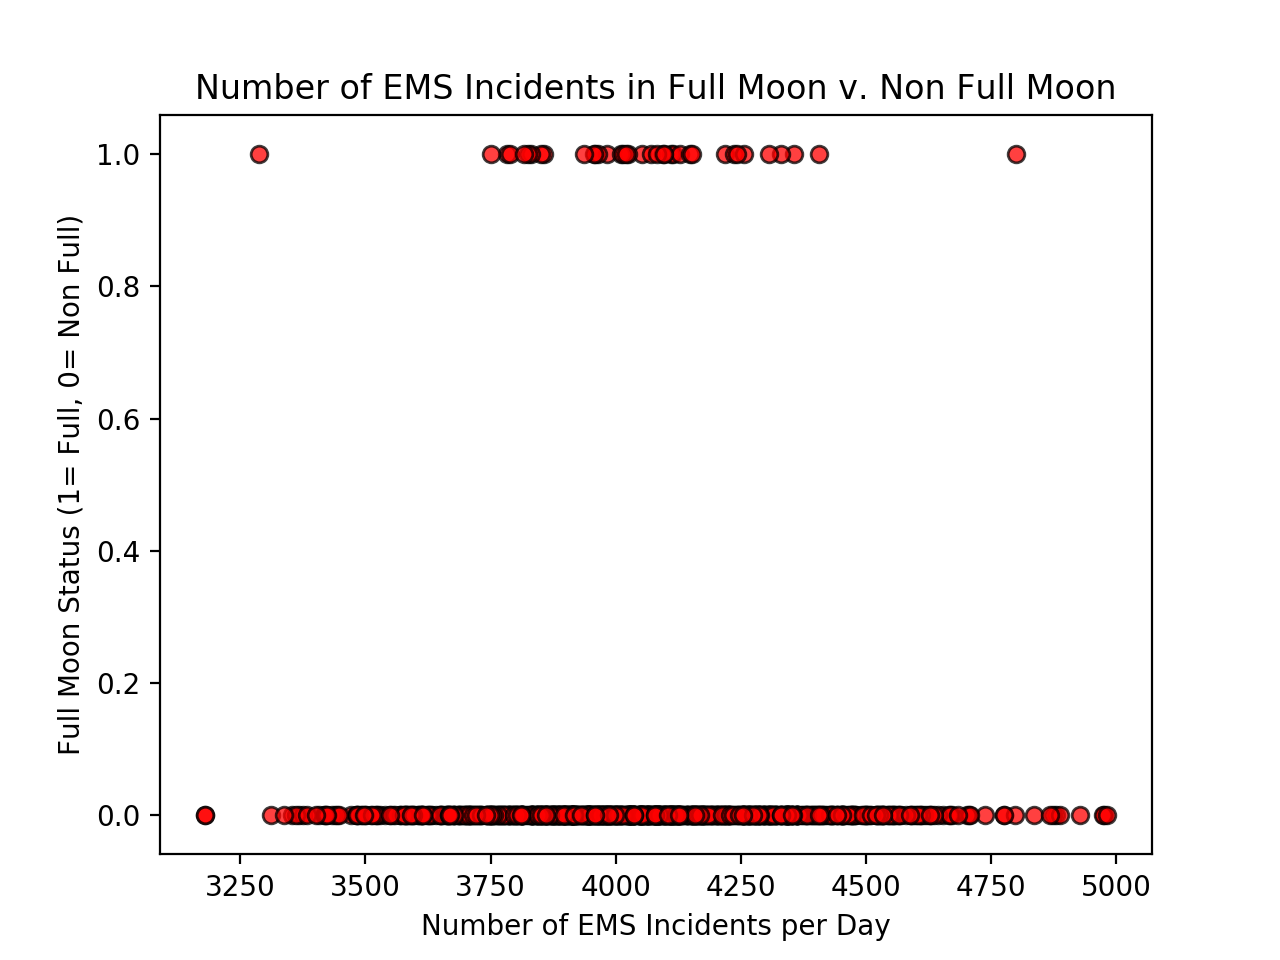

Text(0, 0.5, 'Full Moon Status (1= Full, 0= Non Full)')

In [73]:
#Scatter plot of Number of EMS Incidents in Full Moon v. Non Full Moon
x_axis = darkside['Incident Count']
y_axis = darkside['full_moon']
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Number of EMS Incidents in Full Moon v. Non Full Moon")
plt.xlabel("Number of EMS Incidents per Day")
plt.ylabel("Full Moon Status (1= Full, 0= Non Full)")

<IPython.core.display.Javascript object>


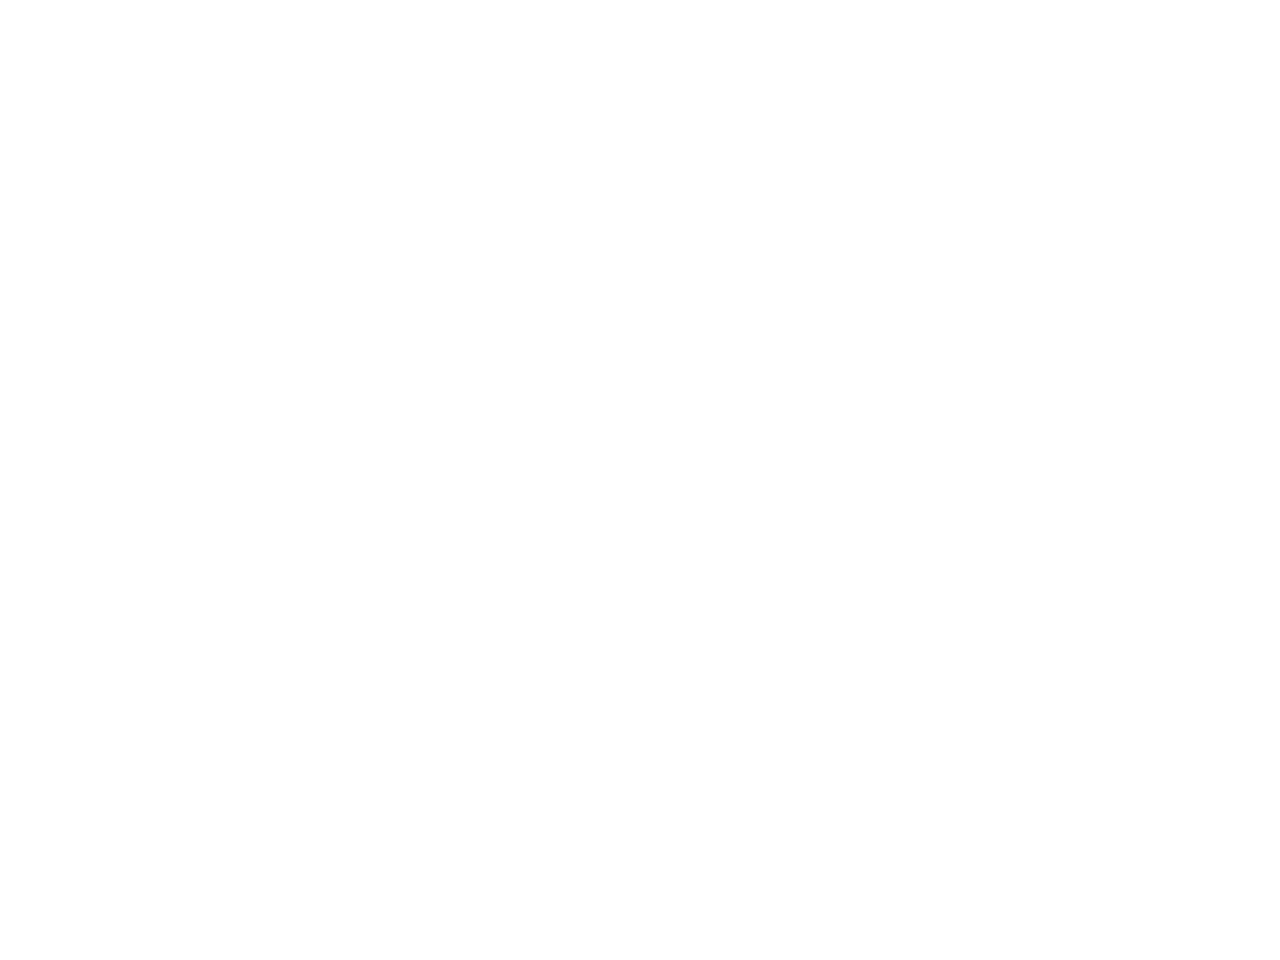

In [74]:
plt.savefig("EMS_Incident_v_Full_Moon_Plot.png")

<IPython.core.display.Javascript object>


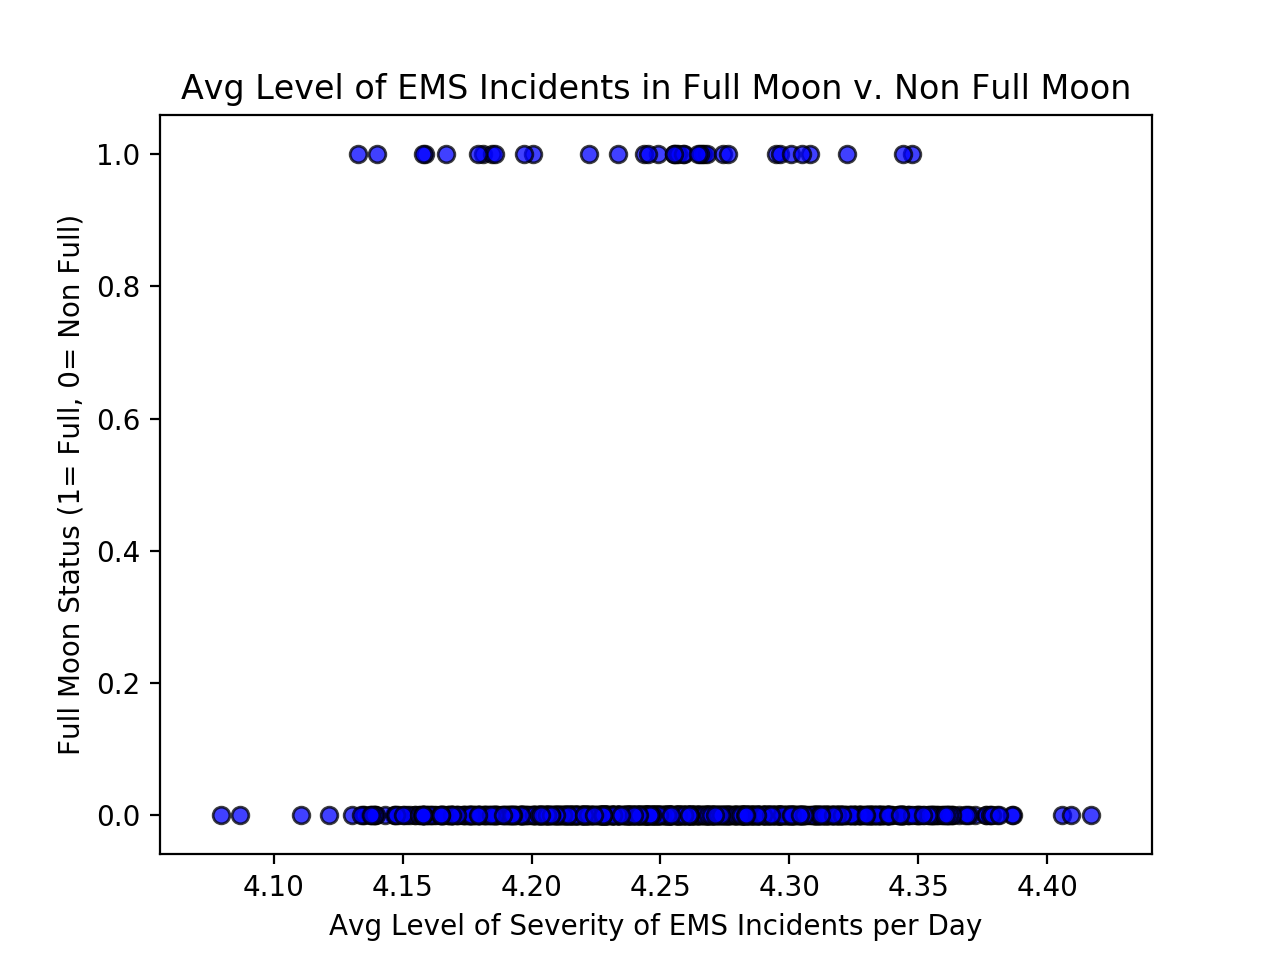

Text(0, 0.5, 'Full Moon Status (1= Full, 0= Non Full)')

In [80]:
#Scatter plot of Number of EMS Incidents in Full Moon v. Non Full Moon
avg_sev = darkside['Avg. Initial Severity Level']
full_moon= darkside['full_moon']
plt.scatter(avg_sev, full_moon, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Avg Level of EMS Incidents in Full Moon v. Non Full Moon")
plt.xlabel("Avg Level of Severity of EMS Incidents per Day")
plt.ylabel("Full Moon Status (1= Full, 0= Non Full)")

<IPython.core.display.Javascript object>


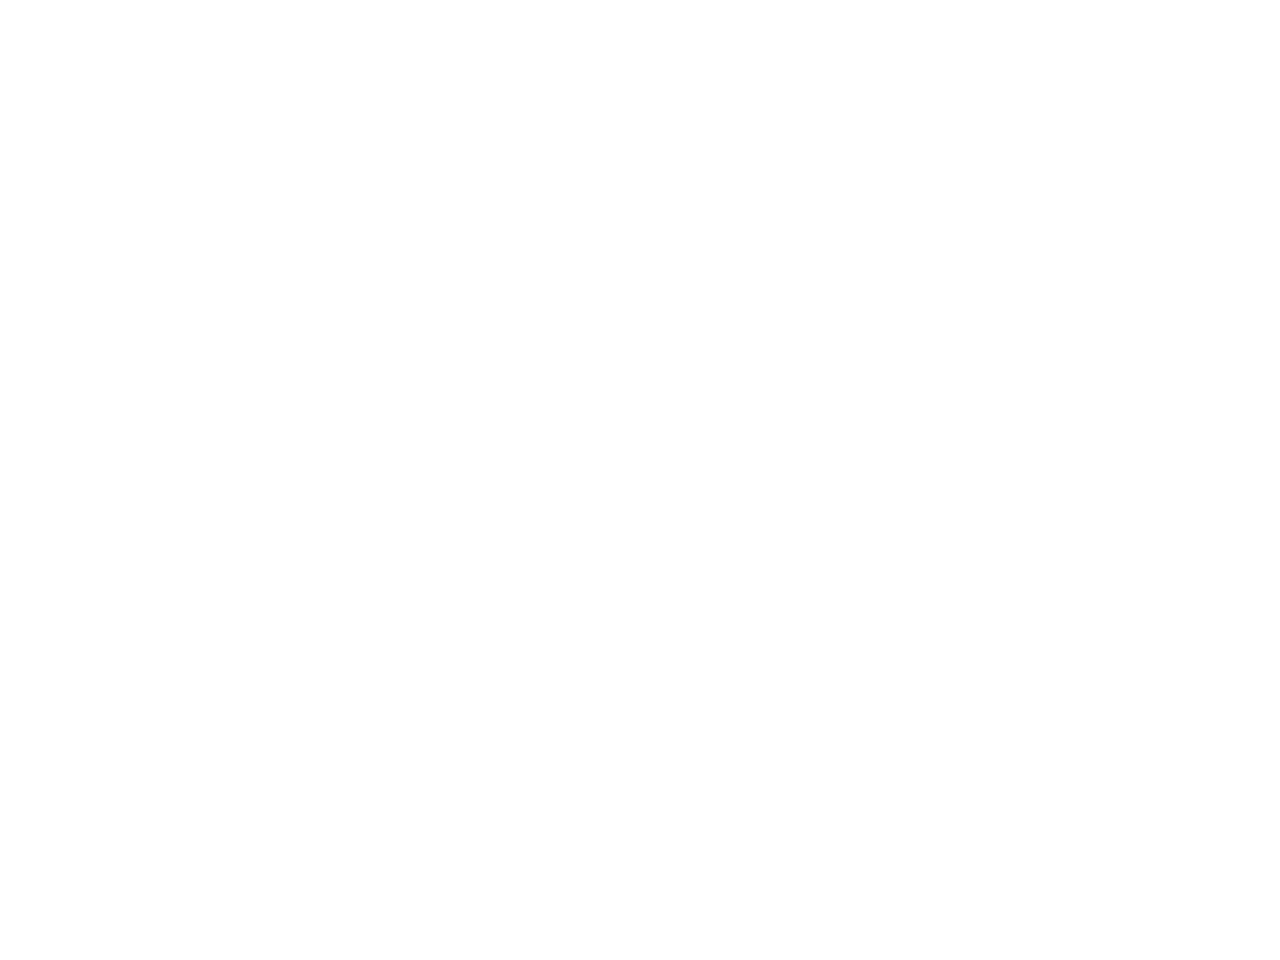

In [76]:
plt.savefig("EMS_Avg._Severity_Level_v_Full_Moon_Plot.png")